In [ ]:
#default_exp Callbacks.SaveModel

In [ ]:
#hide
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# SaveModel
> Learning to use the savemodel callback in fastaiv2

# Imports

In [ ]:
#export
from fastai2.data.all import *
from fastai2.vision.all import *
from nbdev.showdoc import *

In [ ]:
#exports
path = untar_data(URLs.PETS)

In [ ]:
#exports
path_anno, path_img = [path/folder for folder in path.ls()]

In [ ]:
#exports
fname = get_image_files(path_img)
fname[:5]

(#5) [Path('/home/holydemon/.fastai/data/oxford-iiit-pet/images/Sphynx_48.jpg'),Path('/home/holydemon/.fastai/data/oxford-iiit-pet/images/samoyed_126.jpg'),Path('/home/holydemon/.fastai/data/oxford-iiit-pet/images/boxer_20.jpg'),Path('/home/holydemon/.fastai/data/oxford-iiit-pet/images/scottish_terrier_161.jpg'),Path('/home/holydemon/.fastai/data/oxford-iiit-pet/images/shiba_inu_84.jpg')]

In [ ]:
#exports
pat = r'/(\w+)_\d+.jpg'

dblock = DataBlock((ImageBlock,CategoryBlock),
                    splitter=RandomSplitter(),
                    get_items=get_image_files,
                    item_tfms=Resize(224),
                    batch_tfms=aug_transforms(),
                    get_y=RegexLabeller(pat))

In [ ]:
#exports
dls = dblock.dataloaders(path_img, bs=4)

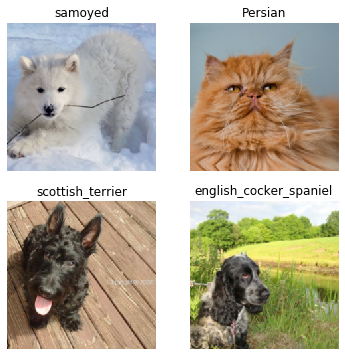

In [ ]:
dls.show_batch()

# SaveModel

In [ ]:
from fastai2.callback.tracker import SaveModelCallback

epoch,train_loss,valid_loss,error_rate,time
0,3.334216,3.849954,0.865359,03:15
1,2.166242,2.162209,0.594046,03:17
2,1.377773,0.983500,0.307848,03:18
3,1.119500,0.803085,0.254398,03:17


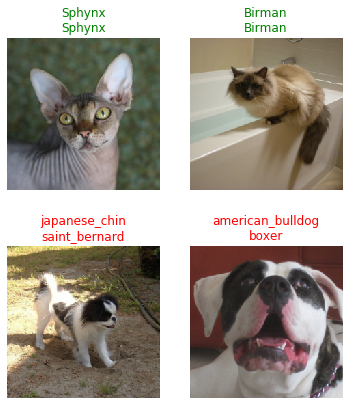

In [ ]:
#show
learner = Learner(dls, resnet34(pretrained=True), metrics=error_rate)
learner.fit_one_cycle(4, cbs=(SaveModelCallback(fname=project_id, with_opt=True, every_epoch=True)))
learner.show_results()